In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
%matplotlib inline
import matplotlib
from scipy.spatial.distance import pdist, squareform, cdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('Ovarian_Cancer.tsv', delimiter='\t', encoding='utf-8')

In [3]:
df.shape

(20062, 362)

In [4]:
df.head()

Gene  TCGA-59-2351  TCGA-13-0906  TCGA-VG-A8LO  TCGA-30-1862  \
0     A1BG      0.031003      0.000000      0.000000      0.000000   
1     A1CF      0.004556      0.022667      0.071077      0.027109   
2      A2M    124.073330     31.948269     32.658268     59.209340   
3    A2ML1      0.239976      1.512645      0.305263      0.320335   
4  A3GALT2      0.069453      0.038375      0.226906      0.494437   

   TCGA-24-1544  TCGA-29-1711  TCGA-24-1560  TCGA-25-2042  TCGA-24-2271  ...  \
0      0.000000      0.000000      0.000000      0.000000      0.000000  ...   
1      0.020786      0.007782      0.021204      0.031218      0.042105  ...   
2     27.817860    111.205650     35.310593    226.345260     98.639080  ...   
3      0.633392      0.104082      0.644408      7.406878      5.237242  ...   
4      0.130900      0.120253      0.515425      0.139922      0.181813  ...   

   TCGA-25-1632  TCGA-25-1313  TCGA-09-1673  TCGA-36-1575  TCGA-13-1408  \
0      0.000000      0.000000      0.051308      0.000000      0.000000   
1      0.020805      0.018365      0.019313      0.120070      0.018027   
2     31.673128    169.240170     82.761530     28.717205     64.779030   
3      0.133237      4.771849      9.469623      4.374663      0.642455   
4      0.098802      0.347096      0.412883      1.503807      0.074530   

   TCGA-MP-A4SY  TCGA-86-8280  TCGA-NJ-A55R  TCGA-86-A456  TCGA-49-4486  
0      0.000000      0.000000      0.020295      0.000000      0.000000  
1      0.023770      0.022746      2.788216      0.121969      0.001307  
2    202.188540    977.725400    420.068150    431.857300     55.579140  
3      0.824331      0.106625      0.238660      0.310400      0.078290  
4      0.040601      0.053352      0.132878      0.000000      0.014101  

[5 rows x 362 columns]

In [5]:
df.describe()

TCGA-59-2351  TCGA-13-0906  TCGA-VG-A8LO  TCGA-30-1862  TCGA-24-1544  \
count  20062.000000  20062.000000  20062.000000  20062.000000  20062.000000   
mean      49.845479     49.845479     49.845479     49.845479     49.845479   
std      561.561082    328.155651    319.557128    374.189425    361.914328   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.272455      0.351791      0.417293      0.411675      0.292311   
50%        4.662355      5.118491      6.246719      6.478471      4.896845   
75%       18.753298     22.489407     25.659468     25.045963     21.248261   
max    52794.470000  13090.336000  12690.970000  23835.568000  18435.998000   

       TCGA-29-1711  TCGA-24-1560  TCGA-25-2042  TCGA-24-2271  TCGA-25-1870  \
count  20062.000000  20062.000000  20062.000000  20062.000000  20062.000000   
mean      49.845479     49.845479     49.845479     49.845479     49.845479   
std      318.358978    361.138984    318.039065    356.703780    375.722829   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.271882      0.335821      0.550168      0.600978      0.420388   
50%        6.497855      5.231399      7.173742      6.608881      6.093636   
75%       27.983285     22.954764     26.796985     24.981183     23.447396   
max    26066.510000  18331.768000  18029.810000  28501.209000  19303.050000   

       ...  TCGA-25-1632  TCGA-25-1313  TCGA-09-1673  TCGA-36-1575  \
count  ...  20062.000000  20062.000000  20062.000000  20062.000000   
mean   ...     49.845479     49.845479     49.845479     49.845479   
std    ...    362.862452    368.571875    345.190491    275.849371   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.285907      0.409805      0.457039      0.803765   
50%    ...      5.101853      5.968827      6.230424      8.660272   
75%    ...     22.889191     23.784470     24.959971     32.866734   
max    ...  23834.473000  25661.960000  16311.359000  12838.568000   

       TCGA-13-1408  TCGA-MP-A4SY  TCGA-86-8280  TCGA-NJ-A55R  TCGA-86-A456  \
count  20062.000000  20062.000000  20062.000000  20062.000000  20062.000000   
mean      49.845479     49.845479     49.845479     49.845479     49.845479   
std      418.500125    281.008456    432.410047    617.314218    308.571796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.476803      0.575982      0.599149      0.826576      0.534888   
50%        5.310961      7.549872      6.933335      7.194776      7.117372   
75%       19.691384     27.466548     23.598507     24.867335     26.547481   
max    28486.385000  12241.309000  37486.164000  70533.640000  16585.783000   

       TCGA-49-4486  
count  20062.000000  
mean      49.845479  
std      546.789817  
min        0.000000  
25%        0.099137  
50%        2.233454  
75%       12.405592  
max    49201.145000  

[8 rows x 361 columns]

In [22]:
df = df.set_index('Gene')

In [6]:
df2 = df.drop(['Gene'],axis=1)

In [7]:
df2

TCGA-59-2351  TCGA-13-0906  TCGA-VG-A8LO  TCGA-30-1862  TCGA-24-1544  \
0          0.031003      0.000000      0.000000      0.000000      0.000000   
1          0.004556      0.022667      0.071077      0.027109      0.020786   
2        124.073330     31.948269     32.658268     59.209340     27.817860   
3          0.239976      1.512645      0.305263      0.320335      0.633392   
4          0.069453      0.038375      0.226906      0.494437      0.130900   
...             ...           ...           ...           ...           ...   
20057      4.486327      8.952440     15.237600     10.300881      3.428663   
20058    304.786500    185.847210    323.109830    184.334760    168.154480   
20059      7.945832      5.402198      5.324690      4.437489      2.308113   
20060     13.909966      8.399917     22.746567     21.657140     15.446981   
20061     14.904263     14.175606     16.567575      8.629230      8.486532   

       TCGA-29-1711  TCGA-24-1560  TCGA-25-2042  TCGA-24-2271  TCGA-25-1870  \
0          0.000000      0.000000      0.000000      0.000000      0.028973   
1          0.007782      0.021204      0.031218      0.042105      0.032257   
2        111.205650     35.310593    226.345260     98.639080    121.713480   
3          0.104082      0.644408      7.406878      5.237242      1.180179   
4          0.120253      0.515425      0.139922      0.181813      0.188493   
...             ...           ...           ...           ...           ...   
20057      8.932863      8.620803      9.324947     11.206594     10.363839   
20058    733.818500    477.346950    438.571780    462.918370    313.874970   
20059      6.325754      3.612933      9.171627      6.259068      7.622621   
20060     18.061283     25.995295     13.357623     17.311409     12.047175   
20061      6.705289     12.618461     14.814802     10.487917      7.934312   

       ...  TCGA-25-1632  TCGA-25-1313  TCGA-09-1673  TCGA-36-1575  \
0      ...      0.000000      0.000000      0.051308      0.000000   
1      ...      0.020805      0.018365      0.019313      0.120070   
2      ...     31.673128    169.240170     82.761530     28.717205   
3      ...      0.133237      4.771849      9.469623      4.374663   
4      ...      0.098802      0.347096      0.412883      1.503807   
...    ...           ...           ...           ...           ...   
20057  ...      5.794407      8.818350     12.654171     17.958607   
20058  ...    500.424840    211.527500    222.550230    503.875580   
20059  ...      1.874200      8.322769      4.635333      9.208283   
20060  ...     16.919163     18.100018     20.640354     29.640270   
20061  ...      8.228959     13.744861      7.656009     10.725437   

       TCGA-13-1408  TCGA-MP-A4SY  TCGA-86-8280  TCGA-NJ-A55R  TCGA-86-A456  \
0          0.000000      0.000000      0.000000      0.020295      0.000000   
1          0.018027      0.023770      0.022746      2.788216      0.121969   
2         64.779030    202.188540    977.725400    420.068150    431.857300   
3          0.642455      0.824331      0.106625      0.238660      0.310400   
4          0.074530      0.040601      0.053352      0.132878      0.000000   
...             ...           ...           ...           ...           ...   
20057      5.580485     10.788005      8.715383      7.075739      9.478019   
20058    228.159670    276.835100    199.613370    107.409340    105.416390   
20059      3.627398      5.419232      7.249623     11.931489      5.113660   
20060      5.375230     14.384599     11.085937      9.155941      8.820824   
20061     12.113133     11.971034     15.412224      6.562078      9.907496   

       TCGA-49-4486  
0          0.000000  
1          0.001307  
2         55.579140  
3          0.078290  
4          0.014101  
...             ...  
20057      4.129781  
20058     25.534214  
20059      1.735661  
20060      2.303771  
20061      2.370478  

[20062 rows x 361 columns]

In [8]:
len(df2.index)

20062

In [9]:
means = []
for i in range(len(df2.index)):
    means.append(df2.iloc[i].mean())

In [10]:
means = pd.Series(means)

In [11]:
means.value_counts()

0.000000    73
0.762711     7
0.129423     7
0.000010     6
0.009807     6
            ..
0.001865     1
4.726219     1
0.201261     1
0.234547     1
4.338918     1
Length: 19900, dtype: int64

In [28]:
means[means > 100].value_counts()

106.479658     1
986.303183     1
450.486880     1
100.658392     1
122.276125     1
              ..
116.934443     1
841.772310     1
144.784514     1
7864.646092    1
170.098067     1
Length: 1376, dtype: int64

In [84]:
clustering = DBSCAN(eps=0.5, min_samples=3).fit(df2)
labels = clustering.labels_
labels = pd.Series(labels)

In [76]:
labels.value_counts()

-1     18946
 0      1065
 4         7
 2         7
 7         5
 6         5
 11        4
 10        4
 1         4
 12        3
 9         3
 8         3
 5         3
 3         3
dtype: int64

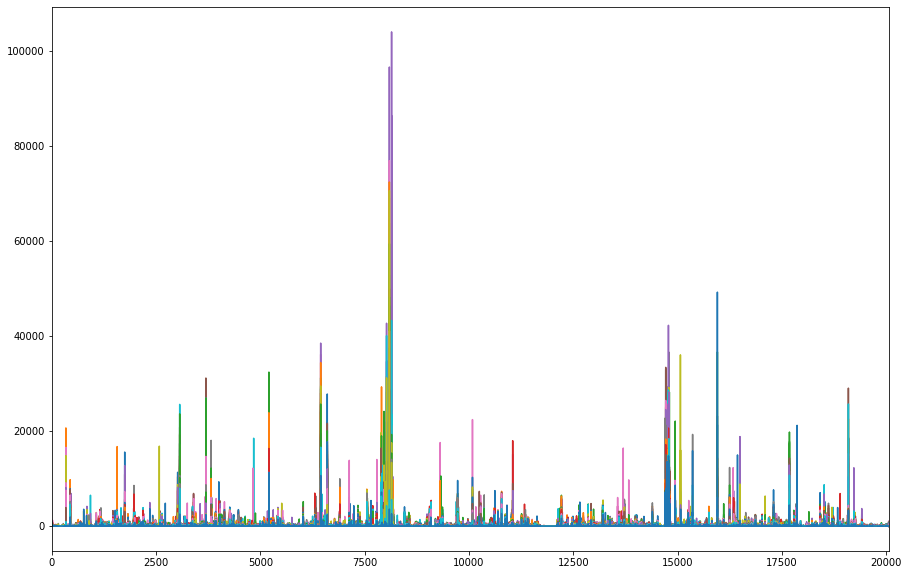

In [19]:
df2.plot(figsize=(15,10), legend=False)

In [24]:
df.median(axis=1)

Gene
A1BG         0.000000
A1CF         0.018125
A2M         78.526630
A2ML1        0.538085
A3GALT2      0.152191
              ...    
ZYG11B       7.007430
ZYX        268.647920
ZZEF1        4.803863
ZZZ3        12.123756
pk          10.868997
Length: 20062, dtype: float64

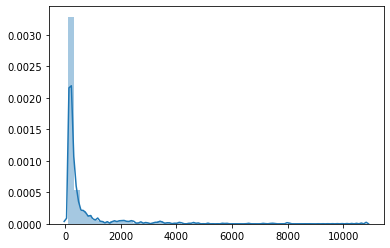

In [29]:
sns.distplot(df[df.median(axis=1)>100].median(axis=1))

In [33]:
df = np.log2(df+1)

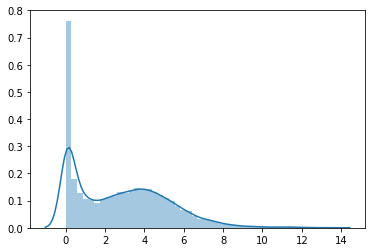

In [35]:
sns.distplot(df.median(axis=1))

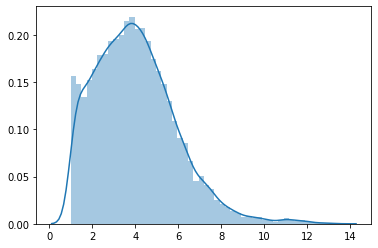

In [37]:
sns.distplot(df[df.median(axis=1)>1].median(axis=1))

In [38]:
df = df[df.median(axis=1)>1]

In [41]:
df.median(axis=1).sort_values(ascending=False).iloc[:1000]

Gene
RPL41        13.394485
EEF1A1       12.970556
FTH1         12.965516
RPL18A       12.964771
RPS27        12.873075
               ...    
SND1          6.885849
DDX17         6.885213
TNFRSF12A     6.884781
FAAP20        6.882478
SNRPD1        6.878861
Length: 1000, dtype: float64

In [42]:
genes = df.median(axis=1).sort_values(ascending=False).iloc[:1000]

In [43]:
df = df.loc[genes.index]

In [44]:
df

TCGA-59-2351  TCGA-13-0906  TCGA-VG-A8LO  TCGA-30-1862  \
Gene                                                                
RPL41         13.266709     13.676325     13.631628     13.423069   
EEF1A1        12.781012     12.515047     13.397622     13.593199   
FTH1          12.736833     12.676986     13.337776     12.571713   
RPL18A        13.142811     12.682673     13.002164     13.225303   
RPS27         12.657844     13.297272     12.581932     13.099307   
...                 ...           ...           ...           ...   
SND1           7.248183      6.879453      7.324607      7.050930   
DDX17          6.660494      6.809249      6.772782      6.730323   
TNFRSF12A      5.890629      6.288491      5.980836      6.839500   
FAAP20         6.415716      7.740808      5.368173      6.681754   
SNRPD1         6.203186      8.238145      7.720747      6.498319   

           TCGA-24-1544  TCGA-29-1711  TCGA-24-1560  TCGA-25-2042  \
Gene                                                                
RPL41         13.511416     12.730843     14.022854     12.239504   
EEF1A1        13.757911     12.844058     13.386661     12.456755   
FTH1          12.054961     14.669965     13.264601     13.767736   
RPL18A        12.016008     12.738591     12.209886     12.111980   
RPS27         12.848887     12.363624     12.774577     12.043852   
...                 ...           ...           ...           ...   
SND1           6.932672      6.690067      6.587228      7.146989   
DDX17          6.604321      7.079246      6.398875      7.041455   
TNFRSF12A      7.628556      7.413241      6.496223      8.332066   
FAAP20         7.210975      6.552037      7.326854      5.805209   
SNRPD1         6.295312      6.927687      6.303829      5.609777   

           TCGA-24-2271  TCGA-25-1870  ...  TCGA-25-1632  TCGA-25-1313  \
Gene                                   ...                               
RPL41         12.653713     13.022929  ...     13.744798     12.983493   
EEF1A1        11.529975     13.447466  ...     14.540823     12.455624   
FTH1          12.493801     11.610572  ...     12.751938     14.647400   
RPL18A        12.454241     14.236616  ...     12.869639     12.333060   
RPS27         12.278298     12.359314  ...     12.385764     13.755973   
...                 ...           ...  ...           ...           ...   
SND1           7.008493      7.656080  ...      6.704539      6.543458   
DDX17          7.027695      7.181322  ...      7.147425      7.375437   
TNFRSF12A      6.700612      5.642603  ...      8.238038      6.753122   
FAAP20         6.004652      6.543432  ...      7.556755      6.532573   
SNRPD1         5.579335      6.719530  ...      6.474611      6.786126   

           TCGA-09-1673  TCGA-36-1575  TCGA-13-1408  TCGA-MP-A4SY  \
Gene                                                                
RPL41         13.678071     13.322883     13.442696     12.510721   
EEF1A1        13.993678     13.465448     13.125229     12.425594   
FTH1          12.918851     12.026436     12.788661     13.579588   
RPL18A        12.420044     11.128853     13.485976     10.929009   
RPS27         13.369757     12.332349     13.350615     12.422279   
...                 ...           ...           ...           ...   
SND1           7.186765      7.120989      5.969818      7.126990   
DDX17          6.722740      8.029150      6.913691      7.030815   
TNFRSF12A      4.624982      6.717481      7.439016      7.894097   
FAAP20         6.752306      6.818995      7.348672      5.646026   
SNRPD1         6.362679      6.658029      7.400017      6.565689   

           TCGA-86-8280  TCGA-NJ-A55R  TCGA-86-A456  TCGA-49-4486  
Gene                                                               
RPL41         12.421230     11.971923     13.077577     13.727046  
EEF1A1        12.523580     12.004243     12.257387     13.460984  
FTH1          12.109727     13.164788     13.296140     12.362123  
RPL18A        

In [80]:
def to_common_samples(df_list=()):
    """
    Accepts a list of dataframes. Returns all dataframes with only intersecting indexes
    :param df_list: list of pd.DataFrame
    :return: pd.DataFrame
    """
    cs = set(df_list[0].index)
    for i in range(1, len(df_list)):
        cs = cs.intersection(df_list[i].index)

    if not len(cs):
        warnings.warn('No common samples!')
    return [df_list[i].loc[list(cs)] for i in range(len(df_list))]

def item_series(item, indexed=None):
    """
    Creates a series filled with item with indexes from indexed (if Series-like) or numerical indexes (size=indexed)
    :param item: value for filling
    :param indexed:
    :return:
    """
    if indexed is not None:
        if hasattr(indexed, 'index'):
            return pd.Series([item]*len(indexed), index=indexed.index)
        elif type(indexed) is int and indexed > 0:
            return pd.Series([item]*indexed, index=np.arange(indexed))
    return pd.Series()

def matrix_projection_plot(data, grouping=None, p_model='PCA', order=(),
                           n_components=2, ax=None, palette=None,
                           alpha=1, random_state=42, s=20, figsize=(5, 5), title='',
                           return_model=False, legend='in', plot_limits=False, label_samples=False, **kwargs):
    """
    Performs a data projection into n_components using p_model and then plots as a scatter plot colored by grouping.
    :param data: pd.DataFrame with samples in index
    :param grouping: pd.Series with samples to group correspondence
    :param p_model: PCA|TSNE|UMAP
    :param order: groups plotting order (useful for limited groups displaying)
    :param n_components: 2
    :param ax: axis to plot
    :param palette: if None -> lin_colors will be applied
    :param alpha: plotting option
    :param random_state: 42
    :param s: point size
    :param figsize: if ax=None a new axis with the figsize will be created
    :param title:
    :param return_model: returns (ax, model)
    :param legend: in|out|None. in - plots the legend inside the plot. out - outside. Otherwise - no legend
    :param plot_limits: limits axes size respect to a plot
    :param label_samples: if True, points on plot will be subscribed with samples' names
    :param kwargs:
    :return:
    """

    if grouping is None:
        grouping = item_series('*', data)

    # Common samples
    c_data, c_grouping = to_common_samples([data, grouping])

    if len(order):
        group_order = copy.copy(order)
    else:
        group_order = np.sort(c_grouping.unique())

    if palette is None:
        cur_palette = lin_colors(c_grouping)
    else:
        cur_palette = copy.copy(palette)

    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    # Get model and transform
    n_components = min(n_components, len(c_data.columns))
    if p_model == 'PCA':
        from sklearn.decomposition import PCA
        model = PCA(n_components=n_components, random_state=random_state, **kwargs)

    elif p_model == 'TSNE':
        from sklearn.manifold import TSNE
        model = TSNE(n_components=n_components, random_state=random_state, **kwargs)

        label_1 = 'tSNE 1'
        label_2 = 'tSNE 2'
    elif p_model == 'UMAP':
        from umap import UMAP
        model = UMAP(n_components=n_components, random_state=random_state, **kwargs)

        label_1 = 'UMAP 1'
        label_2 = 'UMAP 2'
        
    elif p_model == 'Kernel_PCA':
        from sklearn.decomposition import KernelPCA
        model = KernelPCA(n_components=n_components, kernel='precomputed', random_state=random_state, **kwargs)
        
    else:
        raise Exception('Unknown model')

    data_tr = pd.DataFrame(model.fit_transform(c_data), index=c_data.index)

    if p_model == 'PCA':
        label_1 = 'PCA 1 component {}% variance explained'.format(int(model.explained_variance_ratio_[0] * 100))
        label_2 = 'PCA 2 component {}% variance explained'.format(int(model.explained_variance_ratio_[1] * 100))
        
    if p_model == 'Kernel_PCA':
        label_1 = 'KPCA 1st component'
        label_2 = 'KPCA 2nd component'

    for group in group_order:
        samples = list(c_grouping[c_grouping == group].index)
        ax=sns.scatterplot(data_tr[0][samples], data_tr[1][samples], color=cur_palette[group], s=s, alpha=alpha,
                   label=str(group), ax=ax)

    if plot_limits:
        x_lim_min = data_tr[0].min()
        x_lim_max = data_tr[0].max()
        y_lim_min = data_tr[1].min()
        y_lim_max = data_tr[1].max()
        if label_samples:
            delta_x = (x_lim_max + x_lim_min) / 2
            delta_y = (y_lim_max + y_lim_min) / 2
        else:
            delta_x = (x_lim_max + x_lim_min) / 20
            delta_y = (y_lim_max + y_lim_min) / 20

        ax.set_xlim([x_lim_min - delta_x, x_lim_max + delta_x])
        ax.set_ylim([y_lim_min - delta_y, y_lim_max + delta_x])


    if label_samples:
        texts = []
        samples = list(grouping.index)
        sample_names = [x.split("_", 1)[1] for x in samples]
        X = list(data_tr[0])
        Y = list(data_tr[1])
        for i in range(len(samples)):
            texts.append(plt.text(X[i], Y[i], s=str(sample_names[i]), fontsize=8))
        adjust_text(texts, x=X, y=Y, arrowprops=dict(arrowstyle='-', color='black', lw=0.1))
        
    

    if legend == 'out':
        ax.legend(scatterpoints=1, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.1)
    elif legend == 'in':
        ax.legend(scatterpoints=1)

    ax.set_title(title)
    ax.set_xlabel(label_1)
    ax.set_ylabel(label_2)

    if return_model:
        return ax, model
    return ax


def pca_plot(data, grouping=None, n_components=2, title='', ax=None, order=(),
             palette=None, return_model=False, legend='in', **kwargs):
    """
    Pca plot displaying
    :param data: pd.DataFrame(), samples in indexes, features in columns
    :param grouping: pd.Series(), samples in indexes, group values in columns
    :param n_components:
    :param title: str, title of plot
    :param ax:
    :param order:
    :param palette:
    :param return_model: bool, if True then model will be returned
    :param legend:
    :param kwargs:
    :return:
    """
    return matrix_projection_plot(data, grouping, p_model='PCA', n_components=n_components,
                                  title=title, ax=ax, order=order, palette=palette,
                                  return_model=return_model, legend=legend, **kwargs)

def lin_colors(factors_vector, cmap='default', sort=True, min_v=0, max_v=1, linspace=True, lighten_color=None):
    """
    Return dictionary of unique features of "factors_vector" as keys and color hexes as entries
    :param factors_vector: pd.Series
    :param cmap: matplotlib.colors.LinearSegmentedColormap, which colormap to base the returned dictionary on
        default - matplotlib.cmap.hsv with min_v=0, max_v=.8, lighten_color=.9
    :param sort: bool, whether to sort the unique features
    :param min_v: float, for continuous palette - minimum number to choose colors from
    :param max_v: float, for continuous palette - maximum number to choose colors from
    :param linspace: bool, whether to spread the colors from "min_v" to "max_v"
        linspace=False can be used only in discrete cmaps
    :param lighten_color: float, from 0 to +inf: 0 - very dark (just black), 1 - original color, >1 - brighter color
    :return: dict
    """

    unique_factors = factors_vector.dropna().unique()
    if sort:
        unique_factors = np.sort(unique_factors)

    if cmap == 'default':
        cmap = matplotlib.cm.rainbow
        max_v = .92

    if linspace:
        cmap_colors = cmap(np.linspace(min_v, max_v, len(unique_factors)))
    else:
        cmap_colors = np.array(cmap.colors[:len(unique_factors)])

    if lighten_color is not None:
        cmap_colors = [x * lighten_color for x in cmap_colors]
        cmap_colors = np.array(cmap_colors).clip(0, 1)

    return dict(list(zip(unique_factors, [matplotlib.colors.to_hex(x) for x in cmap_colors])))

def umap_plot(data, grouping=None, n_components=2, title='', ax=None, order=(),
             palette=None, return_model=False, legend='in', **kwargs):
    """
    Pca plot displaying
    :param data: pd.DataFrame(), samples in indexes, features in columns
    :param grouping: pd.Series(), samples in indexes, group values in columns
    :param n_components:
    :param title: str, title of plot
    :param ax:
    :param order:
    :param palette:
    :param return_model: bool, if True then model will be returned
    :param legend:
    :param kwargs:
    :return:
    """
    return matrix_projection_plot(data, grouping, p_model='UMAP', n_components=n_components,
                                  title=title, ax=ax, order=order, palette=palette,
                                  return_model=return_model, legend=legend, **kwargs)

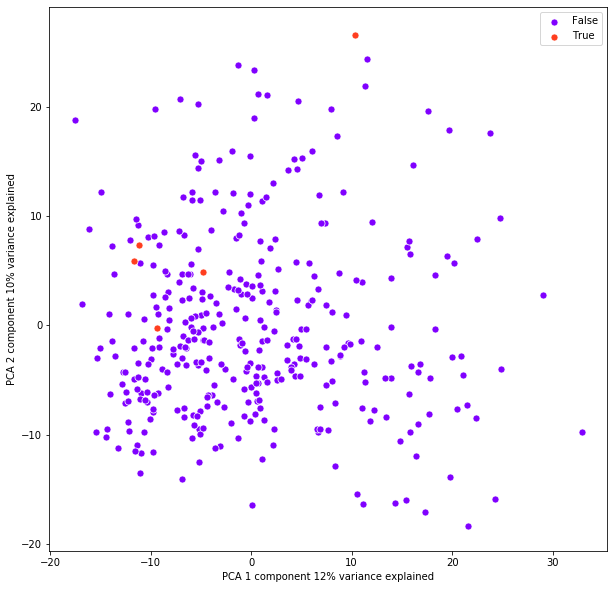

In [63]:
pca_plot(df.T, grouping=pd.Series(df.columns.map(lambda x: x in pac), index=df.columns), figsize=(10,10), s=50)

In [58]:
pac = 'TCGA-MP-A4SY TCGA-86-8280 TCGA-NJ-A55R TCGA-86-A456 TCGA-49-4486'.split(' ')

In [60]:
df.columns.map(lambda x: x in pac)

Index([False, False, False, False, False, False, False, False, False, False,
       ...
       False, False, False, False, False,  True,  True,  True,  True,  True],
      dtype='object', length=361)

In [69]:
def clustered_heatmap2(
    ds, title='', metric='pearson', method='ward',
    yl=False, xl=False, cmap='coolwarm',
    figsize=(13,13), col_colors_h_ratio=1, row_colors_w_ratio=1,
    **kwargs):
    """
    Plot correlation heatmap for rows after performing clustering on dataset "ds"
    :param ds: pd.DataFrame, numerical data only
    """
    
    if metric in ['spearman', 'kendall', 'pearson']:
        similarity_matrix = ds.dropna().T.corr(method=metric)
        dissimilarity_matrix = 1 - similarity_matrix
        hclust_linkage = linkage(squareform(dissimilarity_matrix), method=method)
        
        g = sns.clustermap(similarity_matrix, method=method,
                           row_linkage=hclust_linkage, col_linkage=hclust_linkage,
                           cmap=cmap, yticklabels=yl, xticklabels=xl,
                           figsize=figsize, **kwargs)        
        
    else:
        dissimilarity_matrix = pdist(ds.dropna(), metric=metric)
        hclust_linkage = linkage(dissimilarity_matrix, method=method)
        similarity_matrix = pd.DataFrame(1-squareform(dissimilarity_matrix),
                                        columns=ds.index, index=ds.index)

        g = sns.clustermap(similarity_matrix, method=method,
                           row_linkage=hclust_linkage, col_linkage=hclust_linkage,
                           cmap=cmap, yticklabels=yl, xticklabels=xl,
                           figsize=figsize, **kwargs)

    g.fig.suptitle(title)

    return resize_clustermap_annotation(g, col_colors_h_ratio, row_colors_w_ratio)

def resize_clustermap_annotation(g, col_colors_h_ratio=1, row_colors_w_ratio=1):
    """
    Function changes size of clustermap's row/col_colors annotation
    g: seaborn.matrix.ClusterGrid object. It is returned by sns.clustermap() function
    col_colors_h_ratio: parameters of new clustermaps annotation size
    row_colors_w_ratio: parameters of new clustermaps annotation size
    returns:
    seaborn.matrix.ClusterGrid object (clustermap plot) with resized annotations
    """

    if g.ax_col_colors is not None:
        col = g.ax_col_colors.get_position()
        g.ax_col_colors.set_position([col.x0, col.y0, col.width, col.height * col_colors_h_ratio])

        col_d = g.ax_col_dendrogram.get_position()
        g.ax_col_dendrogram.set_position([col_d.x0, col_d.y0 + col.height * (col_colors_h_ratio - 1),
                                          col_d.width, col_d.height])

    if g.ax_row_colors is not None:
        row = g.ax_row_colors.get_position()
        g.ax_row_colors.set_position([row.x0 - row.width * (row_colors_w_ratio - 1), row.y0,
                                      row.width * row_colors_w_ratio, row.height])

        row_d = g.ax_row_dendrogram.get_position()
        g.ax_row_dendrogram.set_position([row_d.x0 - row.width * (row_colors_w_ratio - 1), row_d.y0,
                                          row_d.width, row_d.height])
    return g

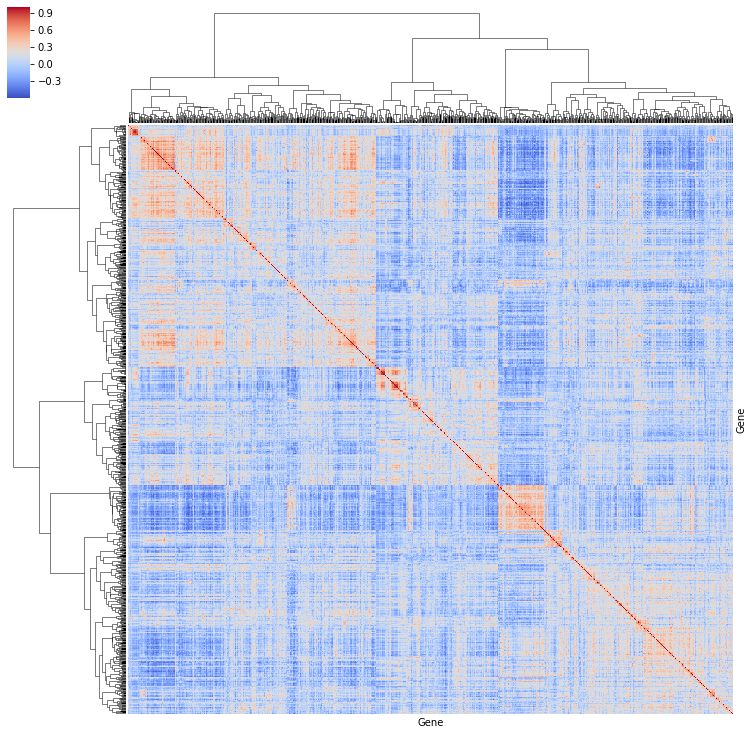

In [74]:
clusters = clustered_heatmap2(df, metric='correlation')

In [76]:
def cut_clustermap_tree(g, n_clusters=2, by_cols=True, name='Clusters'):
    """
    Cut clustermap into desired number of clusters. See scipy.cluster.hierarchy.cut_tree documentation.
    :param g:
    :param n_clusters:
    :param by_cols:
    :param name:
    :return: pd.Series
    """
    from scipy.cluster.hierarchy import cut_tree
    if by_cols:
        link = g.dendrogram_col.linkage
        index = g.data.columns
    else:
        link = g.dendrogram_row.linkage
        index = g.data.index

    return pd.Series(cut_tree(link, n_clusters=n_clusters)[:, 0], index=index, name=name) + 1

In [78]:
x = cut_clustermap_tree(clusters, n_clusters=4)

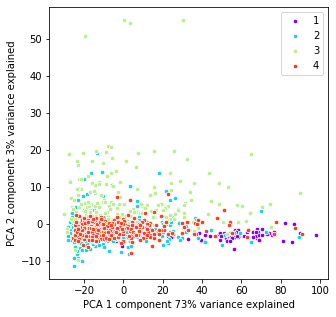

In [79]:
pca_plot(df, grouping=x)

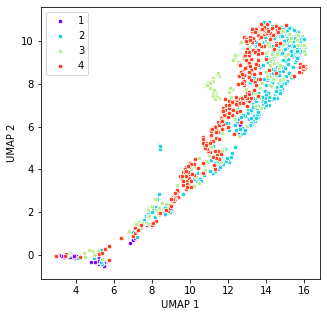

In [82]:
umap_plot(df, grouping=x)

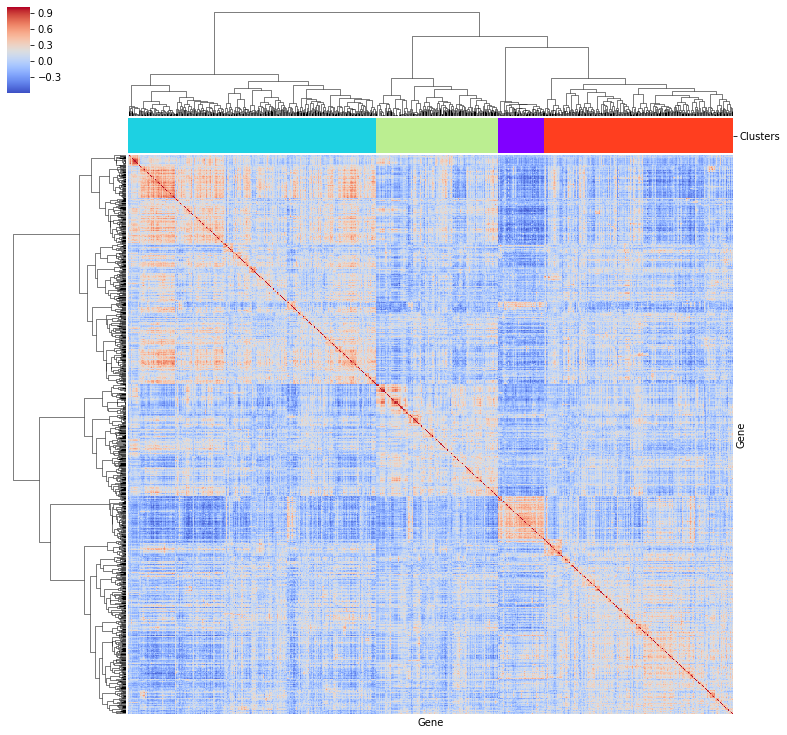

In [83]:
clustered_heatmap2(df, metric='correlation', col_colors=x.map(lin_colors(x)))

In [101]:
clustering = DBSCAN(eps=0.3, min_samples=35, metric='correlation').fit(df)
labels = clustering.labels_
labels = pd.Series(labels, index=df.index)

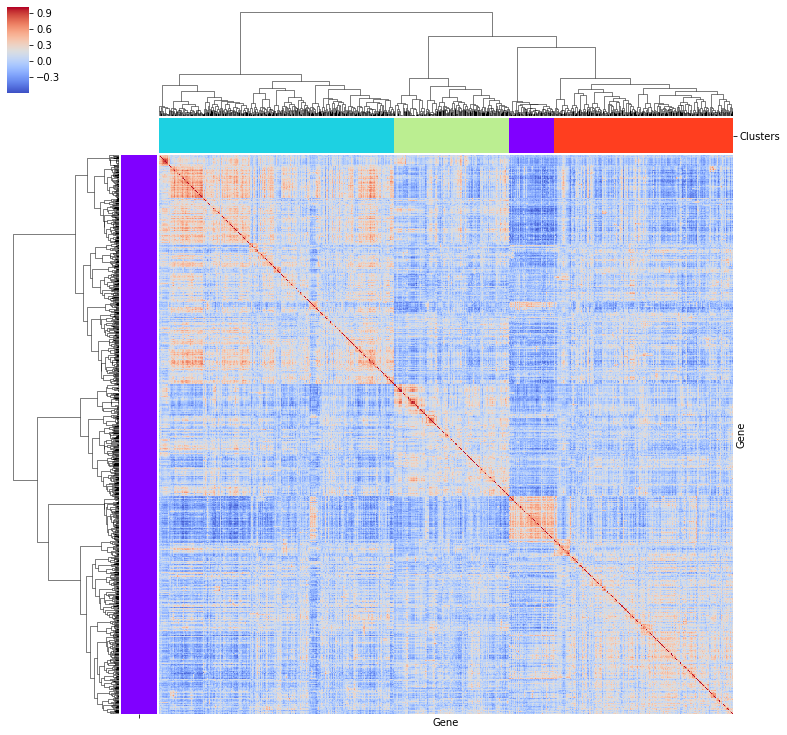

In [102]:
clustered_heatmap2(df, metric='correlation', col_colors=x.map(lin_colors(x)), row_colors=labels.map(lin_colors(labels)))

In [103]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score, davies_bouldin_score

In [104]:
silhouette_score?

In [105]:
silhouette_score(
    df,
    x,
    metric='euclidean'
)

-0.002145590514417253

In [108]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df) 
    kmeanModel.fit(df)     
      
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / df.shape[0] 
    mapping2[k] = kmeanModel.inertia_

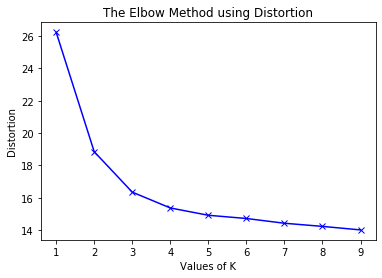

In [109]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [110]:
kmeanModel = KMeans(n_clusters=4).fit(df) 
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
km_clusters = pd.Series(kmeanModel.labels_, index=df.index)

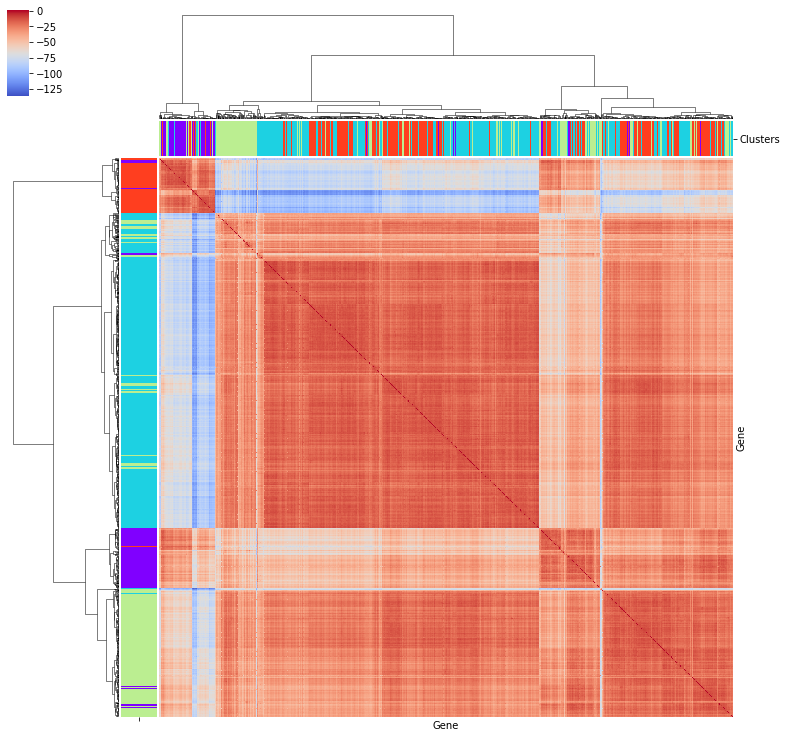

In [114]:
clustered_heatmap2(df, metric='euclidean', col_colors=x.map(lin_colors(x)), row_colors=km_clusters.map(lin_colors(km_clusters)))

In [115]:
df.T.corr()

Gene          RPL41    EEF1A1      FTH1    RPL18A     RPS27     GAPDH  \
Gene                                                                    
RPL41      1.000000  0.305975 -0.189786  0.502214  0.562527  0.151747   
EEF1A1     0.305975  1.000000 -0.062812  0.276938  0.146237  0.090067   
FTH1      -0.189786 -0.062812  1.000000 -0.103481 -0.234687 -0.012157   
RPL18A     0.502214  0.276938 -0.103481  1.000000  0.506057  0.172768   
RPS27      0.562527  0.146237 -0.234687  0.506057  1.000000  0.025873   
...             ...       ...       ...       ...       ...       ...   
SND1      -0.149882  0.255222  0.058688 -0.045782 -0.217174  0.117529   
DDX17     -0.307085  0.201821  0.021753 -0.341698 -0.313405 -0.146944   
TNFRSF12A -0.094193 -0.054728  0.099274 -0.230068 -0.168376  0.048003   
FAAP20     0.085284 -0.093110 -0.123448  0.123745  0.137400  0.159759   
SNRPD1     0.005192 -0.057608 -0.212178 -0.008707  0.117822 -0.003546   

Gene          RPL28    RPL37A     RPL10     RPS18  ...    NDUFS6    TXNDC5  \
Gene                                               ...                       
RPL41      0.326984  0.570063  0.405226  0.493408  ...  0.043045 -0.436523   
EEF1A1    -0.042799  0.196774  0.266179  0.422603  ... -0.281495  0.083267   
FTH1      -0.041858 -0.276743  0.061080 -0.234984  ...  0.171969  0.150641   
RPL18A     0.538880  0.552637  0.542829  0.549244  ...  0.042559 -0.354637   
RPS27      0.508071  0.639923  0.472871  0.604490  ...  0.090028 -0.417746   
...             ...       ...       ...       ...  ...       ...       ...   
SND1      -0.125464 -0.124428 -0.022846 -0.196459  ... -0.251150  0.344017   
DDX17     -0.386078 -0.314982 -0.293186 -0.336631  ... -0.289653  0.343833   
TNFRSF12A -0.124097 -0.112523 -0.126657 -0.218451  ...  0.035950  0.039008   
FAAP20     0.191744  0.235482 -0.052092  0.155756  ...  0.170568 -0.156756   
SNRPD1    -0.021979  0.066403 -0.234591  0.108824  ...  0.231991  0.061617   

Gene         ATXN2L      SELM     SF3B1      SND1     DDX17  TNFRSF12A  \
Gene                                                                     
RPL41     -0.313468 -0.139147 -0.290677 -0.149882 -0.307085  -0.094193   
EEF1A1    -0.018089 -0.237101  0.192781  0.255222  0.201821  -0.054728   
FTH1      -0.114402  0.184729 -0.031859  0.058688  0.021753   0.099274   
RPL18A    -0.284255 -0.075410 -0.312888 -0.045782 -0.341698  -0.230068   
RPS27     -0.351689 -0.074559 -0.302847 -0.217174 -0.313405  -0.168376   
...             ...       ...       ...       ...       ...        ...   
SND1       0.358216 -0.203542  0.453322  1.000000  0.440862  -0.044685   
DDX17      0.581850 -0.042269  0.705646  0.440862  1.000000   0.117986   
TNFRSF12A  0.154823  0.105881  0.062160 -0.044685  0.117986   1.000000   
FAAP20     0.025136  0.034027 -0.147899 -0.205791 -0.176525   0.087040   
SNRPD1     0.136817 -0.032486  0.161937 -0.136340  0.016373   0.052605   

Gene         FAAP20    SNRPD1  
Gene                           
RPL41      0.085284  0.005192  
EEF1A1    -0.093110 -0.057608  
FTH1      -0.123448 -0.212178  
RPL18A     0.123745 -0.008707  
RPS27      0.137400  0.117822  
...             ...       ...  
SND1      -0.205791 -0.136340  
DDX17     -0.176525  0.016373  
TNFRSF12A  0.087040  0.052605  
FAAP20     1.000000  0.093023  
SNRPD1     0.093023  1.000000  

[1000 rows x 1000 columns]